In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

pd.set_option('display.max_columns', 500)

### No. 1

In [2]:
df = pd.read_csv(r'C:\Users\dheof\Downloads\melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Text(0.5, 1.0, 'Distribusi Harga Rumah')

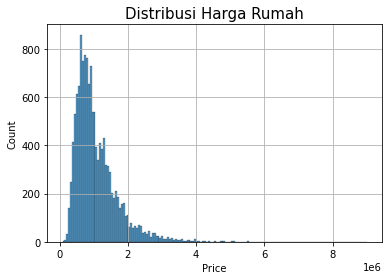

In [3]:
sns.histplot(df['Price'])
plt.grid(True)
plt.title('Distribusi Harga Rumah', size = 15)

### No. 2

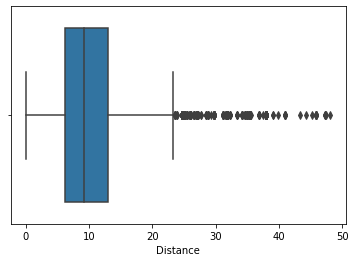

In [4]:
sns.boxplot(x = df['Distance'])
plt.show()

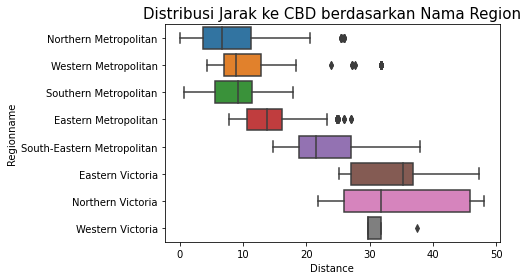

In [5]:
sns.boxplot(x = df['Distance'], y = df['Regionname'])
plt.title('Distribusi Jarak ke CBD berdasarkan Nama Region', size = 15)
plt.show()

### No. 3

In [6]:
mm = df.groupby(['Type']).mean()[['Price']]
mm

,Price
Type,
h,1.242665e+06
t,9.337351e+05
u,6.051275e+05


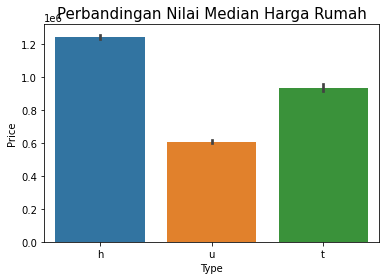

In [7]:
sns.barplot(data = df, x = 'Type', y = 'Price')
plt.title('Perbandingan Nilai Median Harga Rumah', size = 15)
plt.show()

### No. 4

<function matplotlib.pyplot.show(close=None, block=None)>

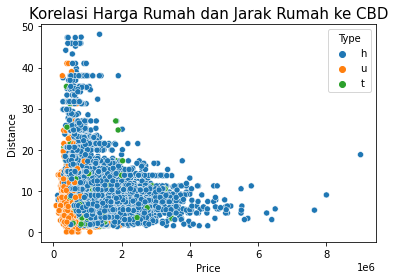

In [8]:
sns.scatterplot(data = df, x = 'Price', y = 'Distance', hue = 'Type')
plt.title('Korelasi Harga Rumah dan Jarak Rumah ke CBD', size = 15)
plt.show

### No. 5

In [9]:
from datetime import date
from datetime import date

df['Month'] = df['Date'].month
df

AttributeError: 'Series' object has no attribute 'month'

### No. 6

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df1 = df.groupby(['Regionname']).sum()[['Landsize']].reset_index(drop = False)
df1

,Regionname,Landsize
0,Eastern Metropolitan,932811.0
1,Eastern Victoria,156334.0
2,Northern Metropolitan,2213208.0
3,Northern Victoria,137574.0
4,South-Eastern Metropolitan,276296.0
5,Southern Metropolitan,2390939.0
6,Western Metropolitan,1455153.0
7,Western Victoria,20976.0


Text(0.5, 1.0, 'Proporsi Luas Tanah Tiap Region')

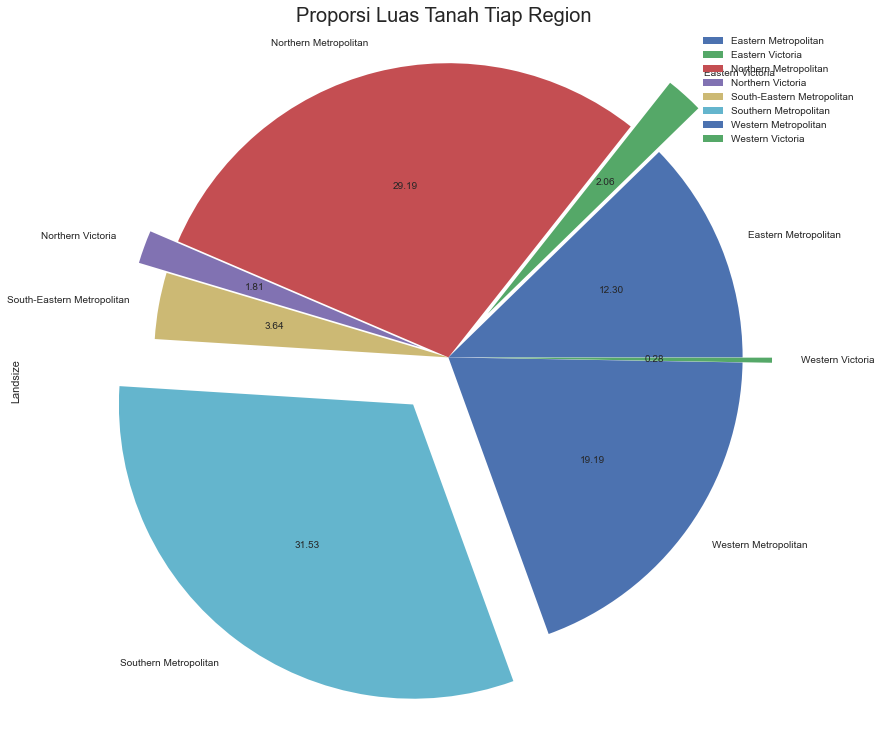

In [ ]:
df1.plot.pie(y = 'Landsize',
                figsize = (15, 13),
                autopct = '%.2f',
                explode = (0, 0.2, 0, 0.1, 0, 0.2, 0, 0.1)
                )
plt.axis('equal')
plt.title('Proporsi Luas Tanah Tiap Region', size = 20)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = px.pie(df1,
            names = 'Regionname',
            values = 'Landsize',
            title = 'Proporsi Luas Tanah Tiap Region')
fig.show()

### No. 7

In [ ]:
correlation_matrix = df[['Price', 'Distance', 'Landsize', 'Rooms']].corr()
correlation_matrix

,Price,Distance,Landsize,Rooms
Price,1.000000,-0.162522,0.037507,0.496634
Distance,-0.162522,1.000000,0.025004,0.294203
Landsize,0.037507,0.025004,1.000000,0.025678
Rooms,0.496634,0.294203,0.025678,1.000000


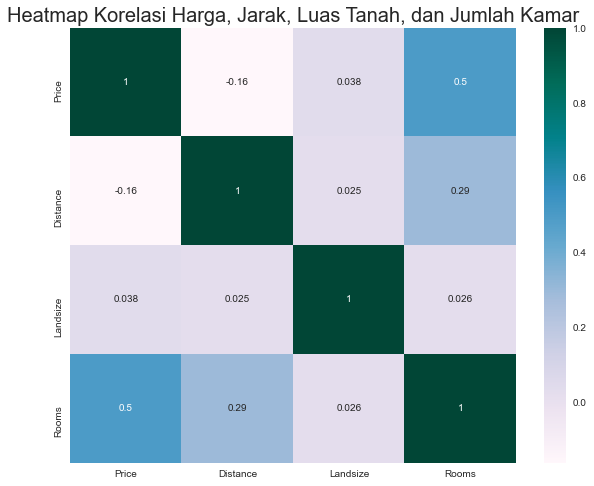

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'PuBuGn')
plt.title('Heatmap Korelasi Harga, Jarak, Luas Tanah, dan Jumlah Kamar', size = 20)
plt.show()

### No. 8

In [ ]:
byprice = df.sort_values(by='Price', ascending=False)
byprice.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,29/07/2017,18.8,3170.0,3.0,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0
7692,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,3126.0,5.0,5.0,4.0,2079.0,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0
9575,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,17/06/2017,5.3,3122.0,4.0,2.0,4.0,1690.0,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0
3616,Kew,15 Barry St,6,h,6500000.0,S,Jellis,13/08/2016,5.6,3101.0,6.0,6.0,3.0,1334.0,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0
12557,Middle Park,136 Page St,5,h,6400000.0,S,Marshall,9/09/2017,3.0,3206.0,5.0,2.0,1.0,553.0,308.0,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019.0
6372,Toorak,17 Albany Rd,3,h,6250000.0,S,Kay,15/10/2016,4.6,3142.0,3.0,3.0,2.0,564.0,342.0,2000.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217.0
7554,Brighton,161 Church St,5,h,5800000.0,PI,Castran,8/04/2017,11.2,3186.0,5.0,4.0,4.0,1276.0,NaN,1880.0,Bayside,-37.91640,144.99740,Southern Metropolitan,10579.0
5631,South Yarra,18 Avoca St,4,h,5700000.0,S,Castran,12/11/2016,3.3,3141.0,4.0,2.0,0.0,292.0,272.0,1880.0,Stonnington,-37.83770,144.98940,Southern Metropolitan,14887.0
9233,Middle Park,204 Page St,6,h,5600000.0,PI,Marshall,3/06/2017,3.0,3206.0,6.0,4.0,2.0,472.0,328.0,1915.0,Port Phillip,-37.85231,144.96373,Southern Metropolitan,2019.0
251,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,17/09/2016,6.3,3143.0,5.0,3.0,4.0,1491.0,516.0,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0


In [ ]:
melbourne_map = folium.Map(location = [-37.8136, 144.9631], zoom_start = 11)
melbourne_map